In [114]:
import pandas as pd 
import matplotlib.pyplot as plt

In [115]:
def loadData(path, nrows=None):
    return pd.read_csv(path, nrows=nrows)

In [116]:
# Load the data form seperate dictionary, because the data is too big to load onto github
# Dataload restricted to 1 million rows, because of speed and memory issues
# Just for testing purposes
dataLondonUTD19 = loadData(path=r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London_UTD19.csv", nrows=1000000)

In [117]:
dataframeLondonUTD19 = pd.DataFrame(dataLondonUTD19)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,error,city,speed
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,0.0,london,NaN
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,0.0,london,NaN
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,0.0,london,NaN
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,0.0,london,NaN
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,0.0,london,NaN


In [118]:
# Drop the error column, because it is not needed
dataframeLondonUTD19 = dataframeLondonUTD19.drop(["error"], axis=1)
dataframeLondonUTD19 = dataframeLondonUTD19.drop(["speed"], axis=1)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london


In [119]:
# Make a new column with the day of the week
dataframeLondonUTD19['day'] = pd.to_datetime(dataframeLondonUTD19['day'])
dataframeLondonUTD19['weekday'] = dataframeLondonUTD19['day'].dt.day_name()
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city,weekday
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday


In [120]:
#Calculate the speed using the formula speed = flow / occupancy
dataframeLondonUTD19['traffic'] = dataframeLondonUTD19['flow'] * dataframeLondonUTD19['occ']
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday,4.08
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday,8.16
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday,8.46
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday,4.90
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday,3.48


In [121]:
#Filter the data for the EAST_N04/161x1 detector
#to test the traffic calculation
dataframeEAST_N04 = dataframeLondonUTD19[dataframeLondonUTD19['detid'] == 'EAST_N04/161x1']
dataframeEAST_N04.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday,4.08
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday,8.16
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday,8.46
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday,4.90
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday,3.48


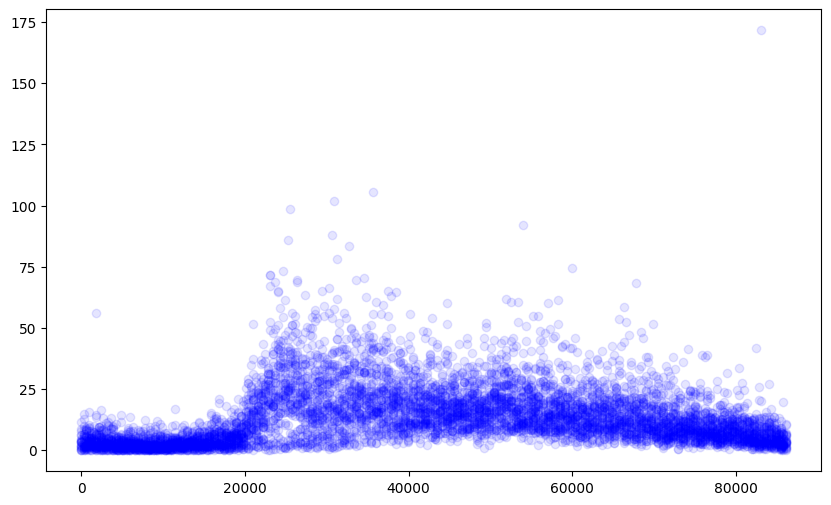

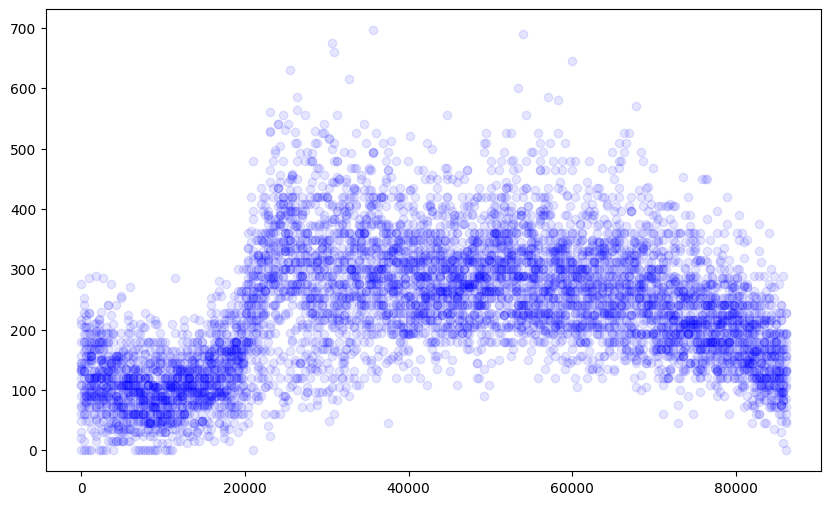

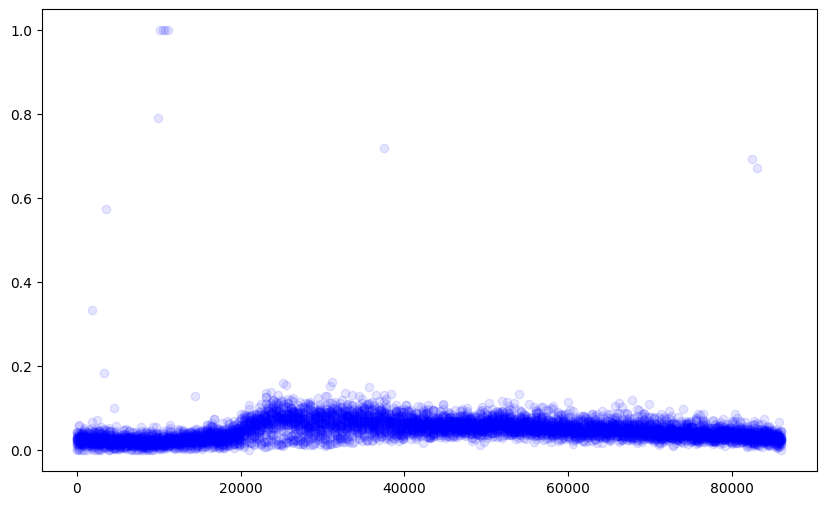

In [122]:
#Plot the speed of the EAST_N04/161x1 detector
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['traffic'], alpha=0.1, color='blue')
plt.show()
#Plot the flow of the EAST_N04/161x1 detector
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['flow'], alpha=0.1, color='blue')
plt.show()
#Plot the occupancy of the EAST_N04/161x1 detector
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['occ'], alpha=0.1, color='blue')
plt.show()

In [123]:
dataframeEAST_N04Saturday = dataframeEAST_N04[dataframeEAST_N04['weekday'] == 'Saturday']
dataframeEAST_N04Saturday.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday,4.08
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday,8.16
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday,8.46
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday,4.90
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday,3.48


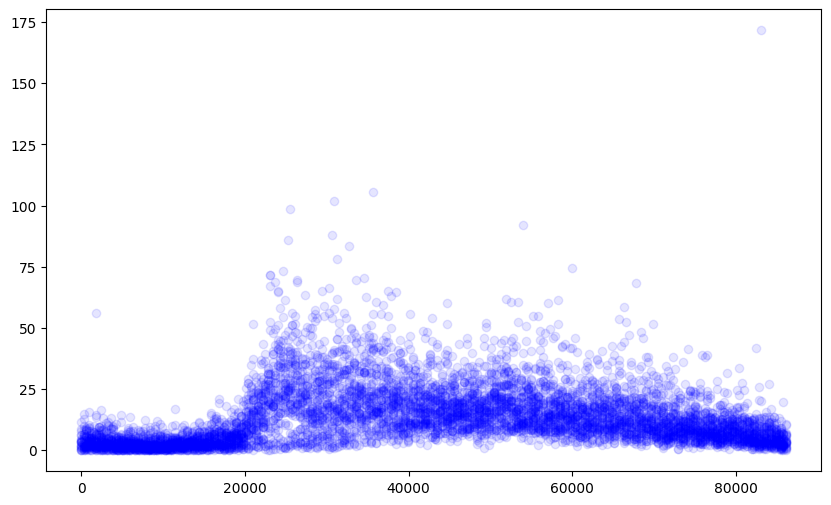

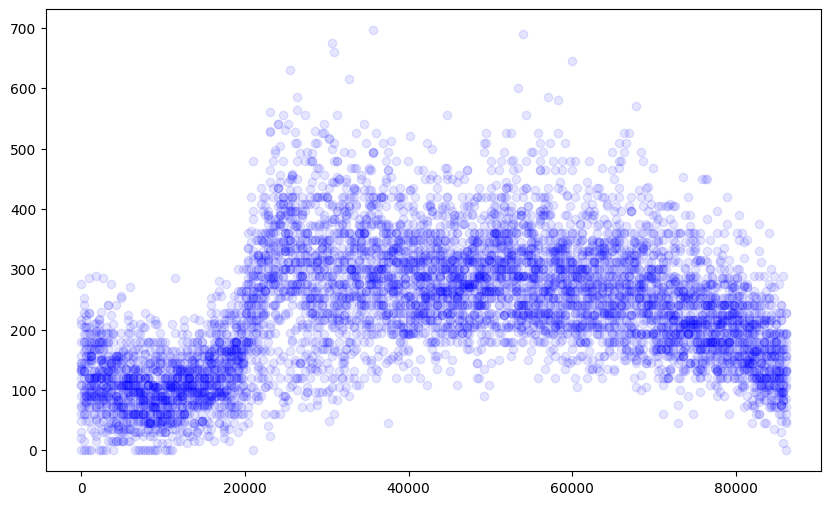

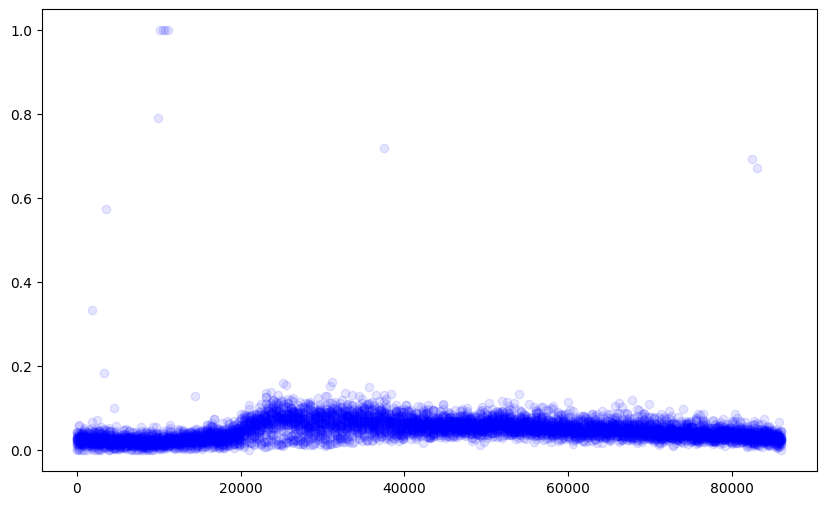

In [124]:
#Plot the speed of the EAST_N04/161x1 detector on a Saturday
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['traffic'], alpha=0.1, color='blue')
plt.show()
#Plot the flow of the EAST_N04/161x1 detector on a Saturday
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['flow'], alpha=0.1, color='blue')
plt.show()
#Plot the occupancy of the EAST_N04/161x1 detector on a Saturday
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['occ'], alpha=0.1, color='blue')
plt.show()

In [125]:
#Clip functions to remove outliers for every detector
def clip_outliers(group):
    #Calculate lower and upper bound of the traffic data
    Q1 = group['traffic'].quantile(0.25)
    Q3 = group['traffic'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    group['traffic'] = group['traffic'].clip(lower=lower_bound, upper=upper_bound)
    return group

In [126]:
# Filter the DataFrame to clip outliers
# Clip means setting the values outside the bounds to the bounds
# This is done to make the data more readable
dataframeLondonUTD19 = dataframeLondonUTD19.groupby('detid').apply(clip_outliers)

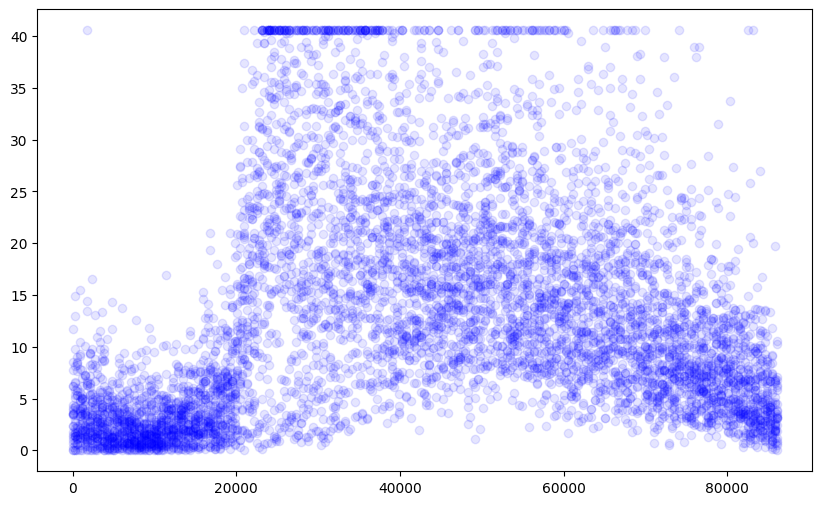

In [127]:
#plot for one detector
dataframeEAST_N04 = dataframeLondonUTD19[dataframeLondonUTD19['detid'] == 'EAST_N04/161x1']
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['traffic'], alpha=0.1, color='blue')
plt.show()

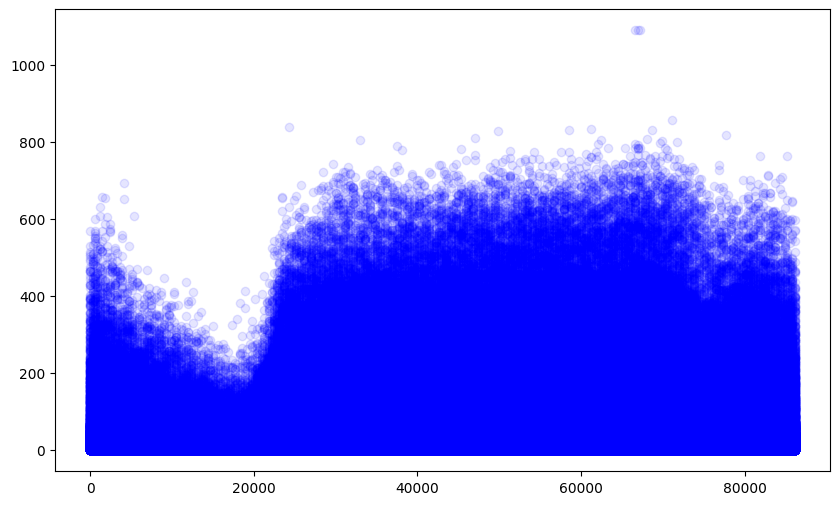

In [128]:
plt.figure(figsize=(10, 6))
plt.scatter(dataframeLondonUTD19['interval'], dataframeLondonUTD19['traffic'], alpha=0.1, color='blue')
plt.show()

In [129]:
# Map the traffic values to a range between 0 and 99
min_traffic = dataframeLondonUTD19['traffic'].min()
max_traffic = dataframeLondonUTD19['traffic'].max()

dataframeLondonUTD19.loc[:,'traffic'] = ((dataframeLondonUTD19['traffic'] - min_traffic) / (max_traffic - min_traffic)) * 99

# Convert the scaled values to integers
dataframeLondonUTD19.loc[:,'traffic'] = dataframeLondonUTD19['traffic'].fillna(0).astype(int)

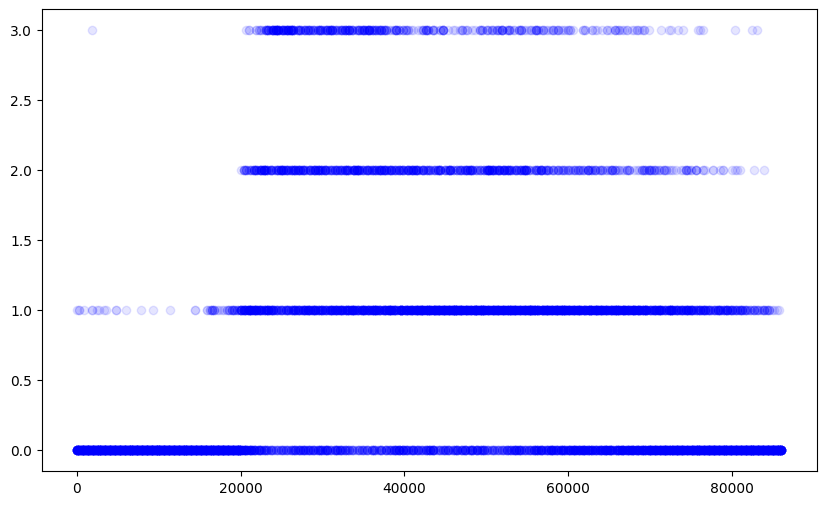

In [130]:
#plot for one detector
dataframeEAST_N04 = dataframeLondonUTD19[dataframeLondonUTD19['detid'] == 'EAST_N04/161x1']
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['traffic'], alpha=0.1, color='blue')
plt.show()